Ideas

drop these:

    Customer ID

    Gender

    PhoneService

    Contract

    TotalCharges

solve imbalance

categorical values

scaling



Work flow

1) import data set

2) check integer and object type variables

3) exploratory data analysis
  

*   check null values
*   check output class distribution for imbalance data set







5) feature engineering

6) data visualization

7) modelling


#Importing dependencies

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [159]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#EDA


In [160]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [161]:
df.shape

(7043, 21)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [163]:
obj = 0
integer = 0
for i in df.columns:
  if df[i].dtype == object:
    obj = obj + 1
  else:
    integer += 1
print(obj,integer)

18 3


out of 20 features 17 are object type and 3 are integer type variables


In [164]:
df.columns = [x.lower() for x in df.columns]

In [165]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

There are no missing values

In [166]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

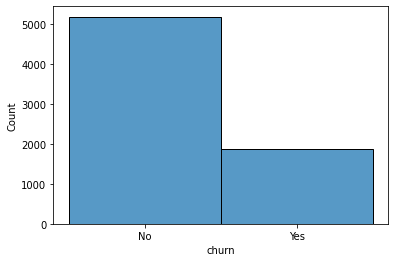

In [167]:
sns.histplot(df.churn)

Target class has imbalance classification distribution positive class (churn = Yes) is much less than negative class (churn = No).
Imbalance data sets will influence the prediction of the model.
We will use undersampling or over sampling to overcome this issue

In [168]:
two_col = []
for i in df.columns:
  if (df[i].value_counts().shape[0] == 2):
    two_col.append(i)
two_col

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'paperlessbilling',
 'churn']

these are the categorical columns which has 2 class

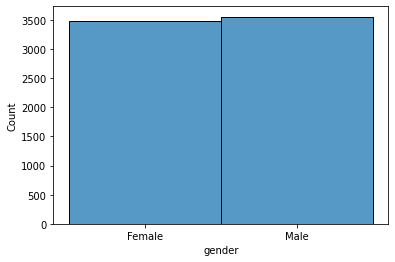

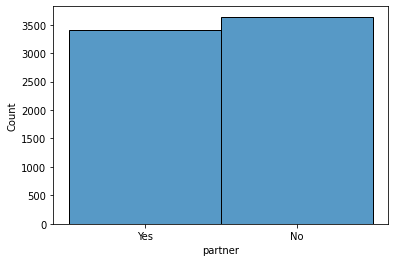

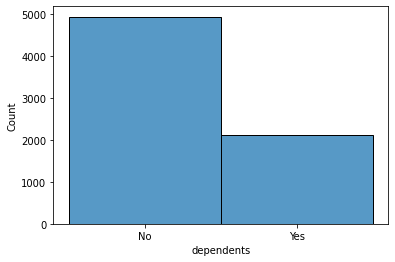

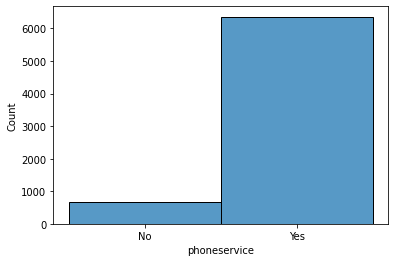

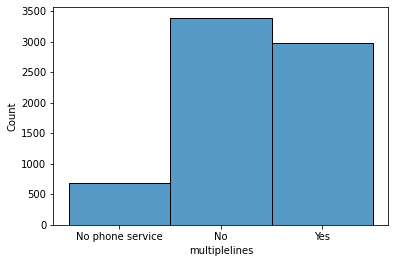

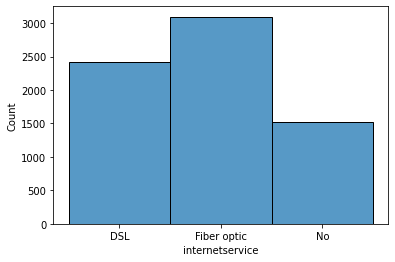

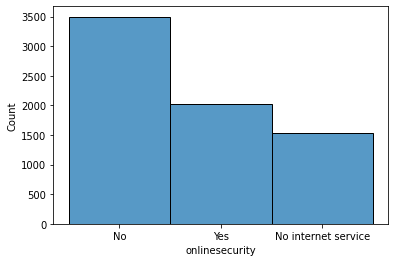

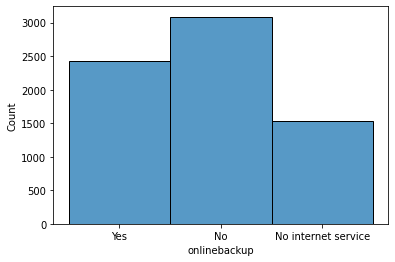

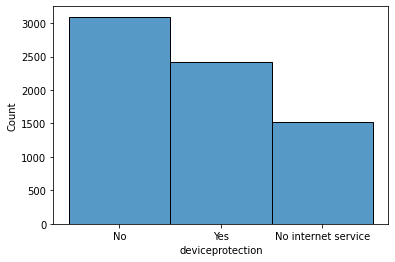

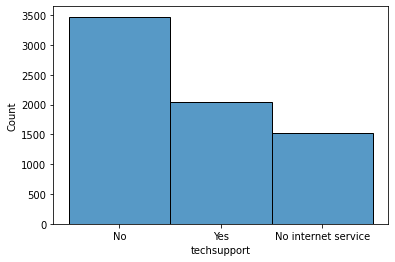

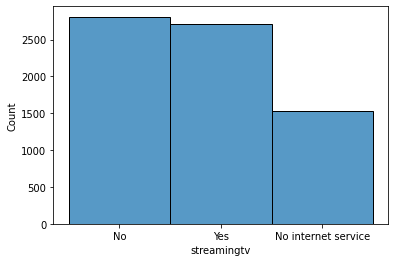

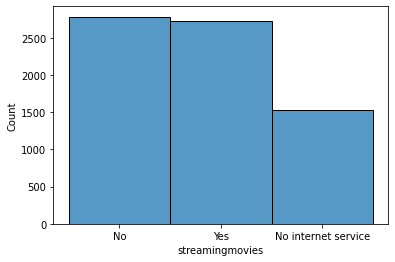

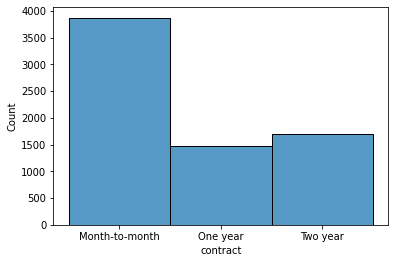

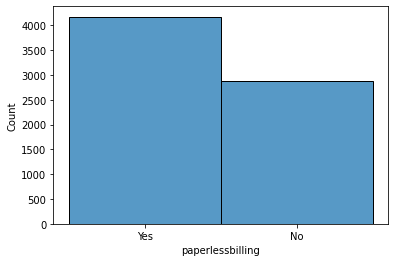

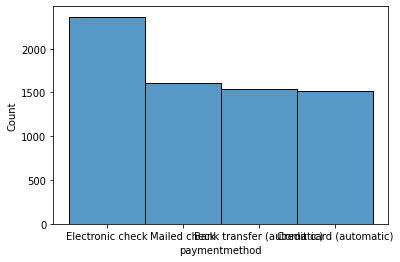

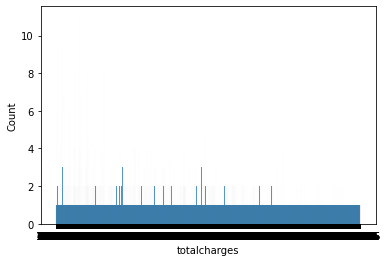

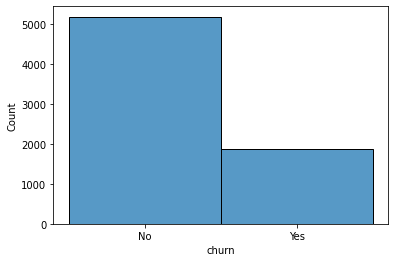

In [169]:
#lets see distrubution of two_class
for i in df.columns :
  if df[i].dtype == object and i!= 'customerid':
    sns.histplot(df[i])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

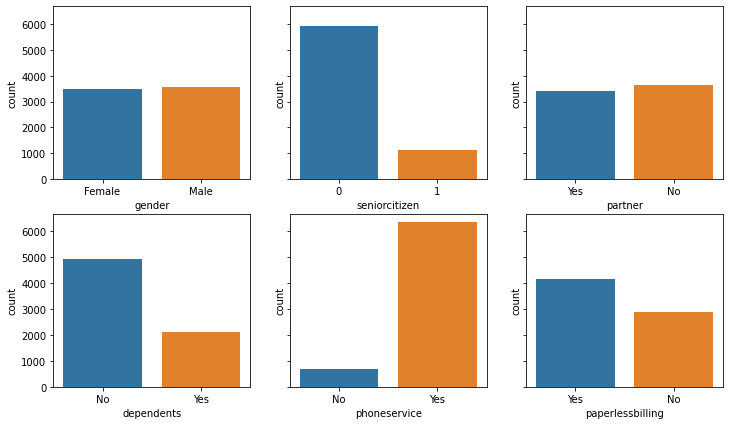

In [170]:
#lets see any relation between binay class columns and target value
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("seniorcitizen", data=df, ax=axes[0,1])
sns.countplot("partner", data=df, ax=axes[0,2])
sns.countplot("dependents", data=df, ax=axes[1,0])
sns.countplot("phoneservice", data=df, ax=axes[1,1])
sns.countplot("paperlessbilling", data=df, ax=axes[1,2])

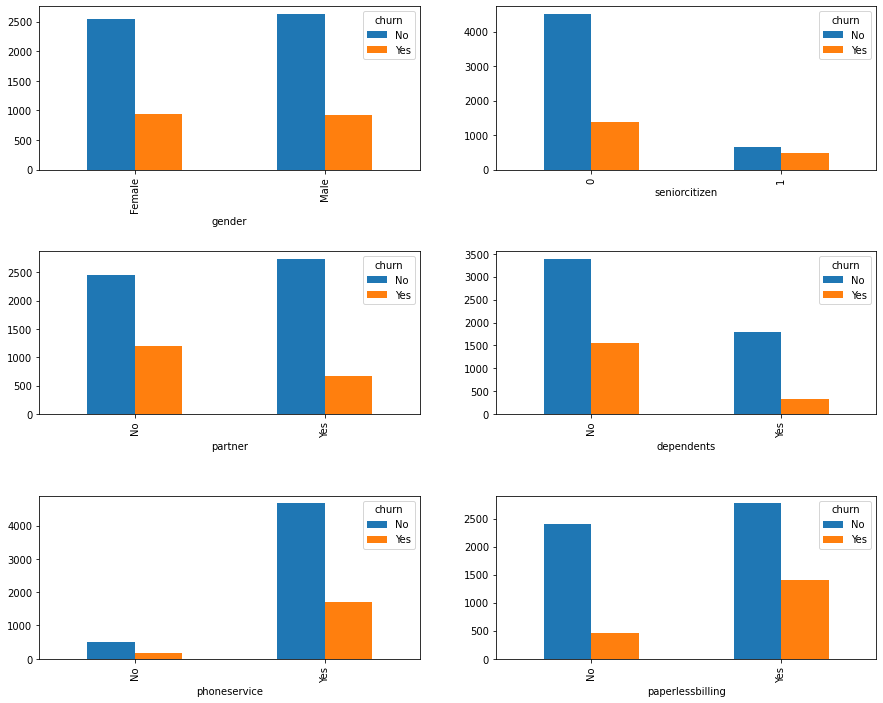

In [171]:
#lets see any relation between binay class columns and target value
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
#for i in (two_col):
for i, ax in zip(two_col, axs.ravel()):
  #ax = plt.subplot(3, 2, n + 1)
  pd.crosstab(df[i],df.churn).plot(kind='bar',ax=ax)
plt.show()

Gender: churn rate for male and female are almost same

senior citizen : senior citizens are less likely to move out

dependents : people who has dependents are less likely to churn 

phoneservice : people with phoneservice are morelikely to move out

paperlessbilling : people with paper billing are more likely to move out

In [172]:
df.churn.replace({'Yes': 1,'No':0},inplace = True)

In [173]:
df['churn'].groupby(df.gender).mean()

gender
Female    0.269209
Male      0.261603
Name: churn, dtype: float64

Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model.

In [174]:
#binary categorical features in terms of churn rate:
x = [(df['churn'].groupby(df[i]).mean()) for i in two_col ]
x

[gender
 Female    0.269209
 Male      0.261603
 Name: churn, dtype: float64, seniorcitizen
 0    0.236062
 1    0.416813
 Name: churn, dtype: float64, partner
 No     0.329580
 Yes    0.196649
 Name: churn, dtype: float64, dependents
 No     0.312791
 Yes    0.154502
 Name: churn, dtype: float64, phoneservice
 No     0.249267
 Yes    0.267096
 Name: churn, dtype: float64, paperlessbilling
 No     0.163301
 Yes    0.335651
 Name: churn, dtype: float64, churn
 0    0.0
 1    1.0
 Name: churn, dtype: float64]

we can also drop phone service.

We can also use pandas pivot_table function to check the relationship between features and target variable.

In [175]:
table = pd.pivot_table(df, values='churn', index=['gender'],
                    columns=['seniorcitizen'], aggfunc=np.mean)
table

seniorcitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


We also have continuous features such as tenure, monthly charges and total charges.

There are 6 variables that come with internet service which are StreamingTV, StreamingMovies, OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport. There variables come into play if customer has internet service.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


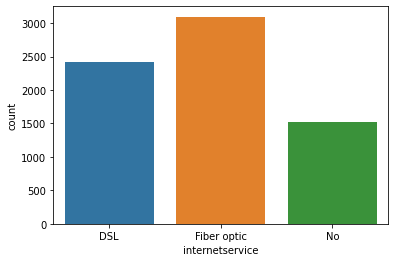

In [176]:
sns.countplot("internetservice", data=df)

In [177]:
df[['internetservice','churn']].groupby(df['internetservice']).mean()

,churn
internetservice,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


people with fiber optic more likely to churn.

 This company may have some problems with fiber optic connection.
 

In [178]:
# lets check their price
df[['internetservice','monthlycharges']].groupby('internetservice').mean()

,monthlycharges
internetservice,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

distributions of internet service related variables:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

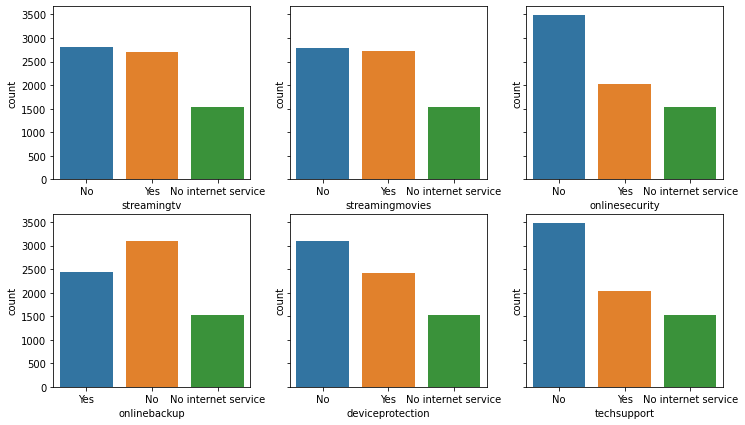

In [179]:
fig, axes = plt.subplots(2,3,figsize = (12,7),sharey = True)
sns.countplot("streamingtv", data=df, ax=axes[0,0])
sns.countplot("streamingmovies", data=df, ax=axes[0,1])
sns.countplot("onlinesecurity", data=df, ax=axes[0,2])
sns.countplot("onlinebackup", data=df, ax=axes[1,0])
sns.countplot("deviceprotection", data=df, ax=axes[1,1])
sns.countplot("techsupport", data=df, ax=axes[1,2])

In [180]:
x = ['streamingtv','streamingmovies','onlinesecurity','onlinebackup','deviceprotection','techsupport']
for i in x:
  print(df[[i,'churn']].groupby('churn').mean())



Empty DataFrame
Columns: []
Index: [0, 1]
Empty DataFrame
Columns: []
Index: [0, 1]
Empty DataFrame
Columns: []
Index: [0, 1]
Empty DataFrame
Columns: []
Index: [0, 1]
Empty DataFrame
Columns: []
Index: [0, 1]
Empty DataFrame
Columns: []
Index: [0, 1]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_gl

In [181]:
a = ['streamingtv','streamingmovies','onlinesecurity','onlinebackup','deviceprotection','techsupport']
x = [(df['churn'].groupby(df[i]).mean()) for i in a ]
#x = [df[[i,'churn']].groupby('churn').mean() for i in a]
x

[streamingtv
 No                     0.335231
 No internet service    0.074050
 Yes                    0.300702
 Name: churn, dtype: float64, streamingmovies
 No                     0.336804
 No internet service    0.074050
 Yes                    0.299414
 Name: churn, dtype: float64, onlinesecurity
 No                     0.417667
 No internet service    0.074050
 Yes                    0.146112
 Name: churn, dtype: float64, onlinebackup
 No                     0.399288
 No internet service    0.074050
 Yes                    0.215315
 Name: churn, dtype: float64, deviceprotection
 No                     0.391276
 No internet service    0.074050
 Yes                    0.225021
 Name: churn, dtype: float64, techsupport
 No                     0.416355
 No internet service    0.074050
 Yes                    0.151663
 Name: churn, dtype: float64]

In [182]:
df.phoneservice.value_counts()

Yes    6361
No      682
Name: phoneservice, dtype: int64

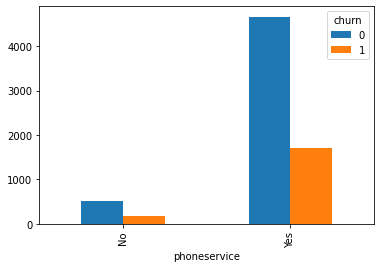

In [183]:
pd.crosstab(df.phoneservice,df.churn).plot(kind ='bar')

In [184]:
df.phoneservice.replace({1: 'yes',0:'no'},inplace = True)

In [185]:
df[['phoneservice','churn']].groupby('phoneservice').mean()

,churn
phoneservice,
No,0.249267
Yes,0.267096


avg churn rate for people with phoneservice and no phone service are almost same which means it doesnt bring any valuable data for prediction

In [186]:
df.multiplelines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiplelines, dtype: int64

If a customer does not have a phone service, he/she cannot have multiple lines. MultipleLines column includes more specific data compared to PhoneService column. So I will not include PhoneService column as I can understand the number of people who have phone service from MultipleLines column. MultipleLines column takes the PhoneService column one step further.

In [187]:
df[['multiplelines','churn']].groupby('multiplelines').mean()


,churn
multiplelines,
No,0.250442
No phone service,0.249267
Yes,0.286099


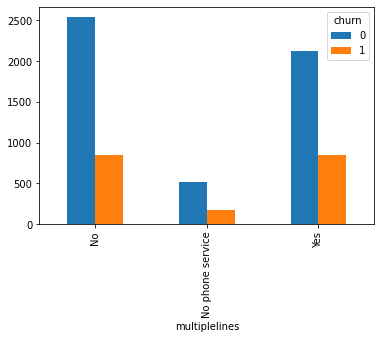

In [188]:
pd.crosstab(df.multiplelines,df.churn).plot(kind ='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


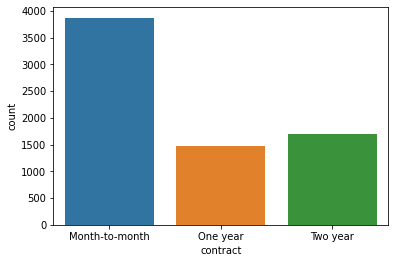

In [189]:
sns.countplot('contract',data =df)

In [190]:
df[['contract','churn']].groupby('contract').mean()


,churn
contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


It seems like, as expected, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


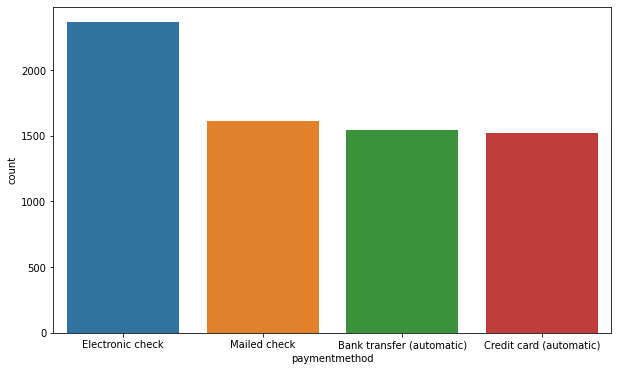

In [191]:
plt.figure(figsize = (10,6))
sns.countplot('paymentmethod',data =df)

In [192]:
df[['paymentmethod','churn']].groupby('paymentmethod').mean()

,churn
paymentmethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types. Therefore, this segment may be further investigated if customers paying with electronic checks have any other thing in common.

The continuous features are tenure, monthly charges and total charges. The amount in total charges column is proportional to tenure (months) multiplied by monthly charges. So it is unnecessary to include total charges in the model.

check the distribution of continuous values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


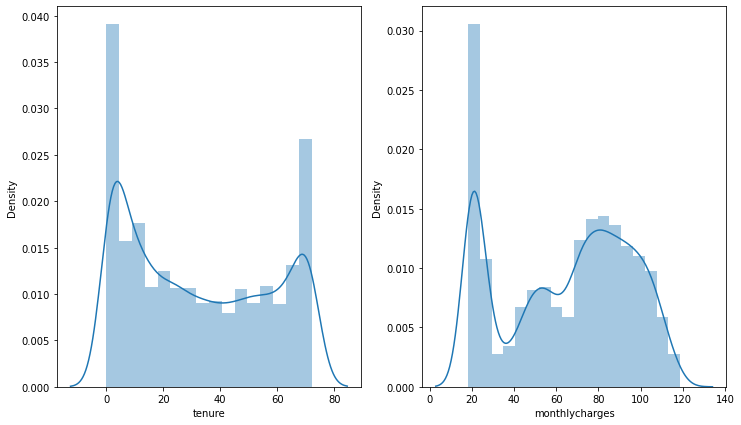

In [193]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["monthlycharges"], ax=axes[1])

According to the distribution of tenure(Number of months the customer has stayed with the company.) variable, most of the customers are either pretty new or have stayed for a long time with the company. Our goal should be finding a way to keep those customers with a tenure of up to a few months.

In [194]:
df[['tenure','monthlycharges','churn']].groupby('churn').mean()

,tenure,monthlycharges
churn,,
0,37.569965,61.265124
1,17.979133,74.441332


It is clear that people who have been a customer for a long time tend to stay with the company. The average tenure in months for people who left the company is 20 months less than the average for people who stay.

It seems like monthly charges also have an effect on churn rate.

Contract and tenure features may be correlated because customer with long term contract are likely to stay longer with the company.

In [195]:
df[['contract','tenure','churn']].groupby('contract').mean()

,tenure,churn
contract,,
Month-to-month,18.036645,0.427097
One year,42.044807,0.112695
Two year,56.735103,0.028319


As expected, contract and tenure are highly correlated. Customers with long contracts have been a customer for longer time than customers with short-term contracts. I think contract will add little to no value to tenure feature so I will not use contract feature in the model.

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model:

Customer ID
Gender
PhoneService
Contract
TotalCharges

In [196]:
df.drop(['customerid','gender','phoneservice','contract','totalcharges'],axis = 'columns',inplace =True)

#Data Preprocessing

In [197]:
df.head()

,seniorcitizen,partner,dependents,tenure,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [198]:
cat_features = ['seniorcitizen', 'partner', 'dependents',
'multiplelines', 'internetservice','onlinesecurity','onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
'streamingmovies', 'paperlessbilling', 'paymentmethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [199]:
X.head()

,tenure,monthlycharges,churn,seniorcitizen_1,partner_Yes,dependents_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


scaling continuous values

In [200]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['monthlycharges']])

In [201]:
X['tenure'] = a
X['monthlycharges'] = b

In [202]:
X.shape

(7043, 26)

In [203]:
dg = X.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution Before Resampling')

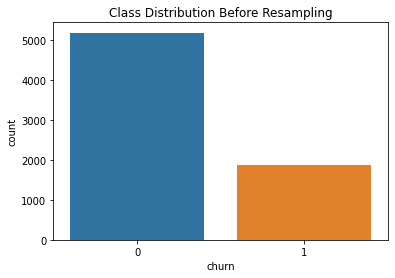

In [204]:
sns.countplot('churn', data=df).set_title('Class Distribution Before Resampling')

In [205]:
from imblearn.over_sampling import SMOTE 

In [206]:
# sm = SMOTE(random_state= 2)
dg.drop('churn',axis = 'columns',inplace = True)


In [207]:
y = df.churn

In [208]:
# oversampling  using smote sysnthetic mibority oversampling technique
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(dg, y)

In [209]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5174, 1: 5174})


In [210]:
X_res.shape

(10348, 25)

In [211]:
X_res['churn'] = y_res

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution after Resampling')

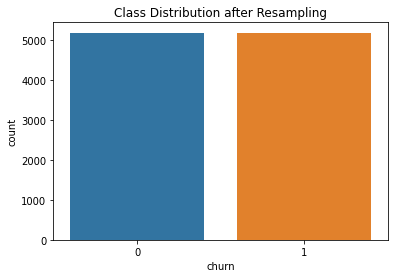

In [212]:
sns.countplot('churn', data=X_res).set_title('Class Distribution after Resampling')

In [213]:
X_res.churn.value_counts()

0    5174
1    5174
Name: churn, dtype: int64

In [214]:
X_res.tail()

,tenure,monthlycharges,seniorcitizen_1,partner_Yes,dependents_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn
10343,0.584808,0.860538,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1
10344,0.107191,0.508944,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
10345,0.073186,0.516114,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
10346,0.051428,0.605587,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
10347,0.310036,0.724699,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1


In [215]:
# from imblearn.over_sampling import SMOTENC
# smnc = SMOTENC(random_state=2,categorical_features = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,21,22,23])
# X_nc, y_nc = smnc.fit_resample(q,e)

In [216]:
pd.set_option('display.max_columns', None)
dg.head()

,tenure,monthlycharges,seniorcitizen_1,partner_Yes,dependents_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.013889,0.115423,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [217]:
data = X_res.copy()

In [218]:
X_res.head()

,tenure,monthlycharges,seniorcitizen_1,partner_Yes,dependents_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn
0,0.013889,0.115423,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.027778,0.354229,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0.625000,0.239303,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,0.027778,0.521891,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


#Model Creation and evaluation

In [219]:
data.head()

,tenure,monthlycharges,seniorcitizen_1,partner_Yes,dependents_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn
0,0.013889,0.115423,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.027778,0.354229,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0.625000,0.239303,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,0.027778,0.521891,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [220]:
y = data.churn
x = data.drop('churn',axis = 'columns')

In [222]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

I have decided to use ridge classifier as a base model. Then I will try a model that I think will perform better.

In [224]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

Making predictions on training set and evaluating:

In [225]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.7788113070790046

Making predictions on test set and evaluating:



In [226]:
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.797584541062802

The model is not overfitting because accuracy on train set and test are really close. However 79% is not so good lets try another

In [228]:
clf_lr = LogisticRegression() #create a ridge classifier object
clf_lr.fit(X_train, y_train) #train the model

LogisticRegression()

In [229]:
pred = clf_lr.predict(X_train)
accuracy_score(y_train, pred)

0.7734960135298381

In [230]:
pred_test = clf_lr.predict(X_test)
accuracy_score(y_test, pred_test)

0.7888888888888889

There is no much diff between ridge classifier and logistic regression


In [250]:
clf_forest = RandomForestClassifier(n_estimators=500, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500)

n_estimators: The number of trees in the forest.

max_depth: The maximum depth of the tree.

In [251]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8688088910364823

In [252]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8115942028985508

#Improving model

In [254]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [256]:
clf.fit(x, y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [257]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 250}

In [258]:
clf.best_score_

0.831082858763948

#experiment(increasing the number of samples of the class with less samples by randomly selecting rows from it.)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution Before Resampling')

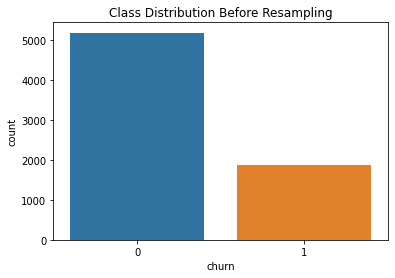

In [259]:
sns.countplot('churn', data=df).set_title('Class Distribution Before Resampling')

In [262]:
X_no = X[X.churn == 0]
X_yes = X[X.churn == 1]

In [264]:
X_no.shape

(5174, 26)

In [265]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution After Resampling')

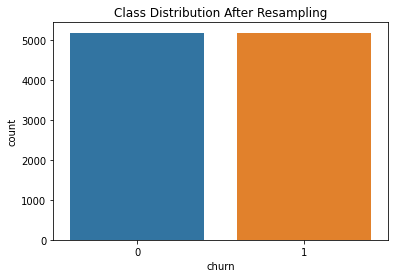

In [267]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [271]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['churn'], axis=1) #features (independent variables)
y = X_upsampled['churn'] #target (dependent variable)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [273]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [275]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [276]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 200}

In [277]:
clf.best_score_

0.9001743706848042

In [281]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1044
           1       0.83      0.87      0.85      1026

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [283]:
clf_forest.score(X_test,y_test)

0.8468599033816425